### Rossmann Store sales price prediction Reggression

In [14]:
#import base libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

In [15]:
train = pd.read_csv("train.csv",parse_dates=['Date'])
test  = pd.read_csv("test.csv")
store = pd.read_csv("store.csv")

/var/folders/5s/jcx1bbbj423bxf9z2l296d800000gn/T/ipykernel_3016/3052399663.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv",parse_dates=['Date'])


In [16]:
print("train data shape: ", train.shape)
print("test data shape:  ", test.shape)
print("store data shape: ", store.shape)

train data shape:  (1017209, 9)
test data shape:   (41088, 8)
store data shape:  (1115, 10)


In [17]:
train.sample(10)
#train.shape

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
693509,765,5,2013-10-18,7261,676,1,0,0,0
299306,339,6,2014-10-25,3862,564,1,0,0,0
93584,1040,6,2015-05-09,7615,739,1,0,0,0
490274,460,5,2014-04-18,0,0,0,1,b,0
764975,871,4,2013-08-15,5925,476,1,1,0,1
105934,10,1,2015-04-27,7558,743,1,1,0,0
273890,133,5,2014-11-21,5470,668,1,0,0,0
818193,569,5,2013-06-28,4661,674,1,0,0,1
806444,1085,2,2013-07-09,6426,708,1,0,0,1
917089,230,7,2013-03-31,0,0,0,0,0,0


In [5]:
test.sample(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
3380,3381,1060,1,2015-09-14,1.0,1,0,0
2416,2417,912,2,2015-09-15,1.0,1,0,0
29829,29830,937,5,2015-08-14,1.0,0,0,1
34085,34086,908,7,2015-08-09,0.0,0,0,1
21477,21478,102,7,2015-08-23,0.0,0,0,0
1946,1947,305,2,2015-09-15,1.0,1,0,0
33477,33478,126,7,2015-08-09,0.0,0,0,0
9847,9848,558,7,2015-09-06,0.0,0,0,0
18864,18865,43,3,2015-08-26,1.0,0,0,0
25045,25046,289,3,2015-08-19,1.0,1,0,1


In [6]:
store.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
400,401,a,c,9200.0,10.0,2009.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct"
859,860,c,c,5980.0,2.0,2010.0,0,NaN,NaN,NaN
1069,1070,c,c,400.0,10.0,2008.0,0,NaN,NaN,NaN
975,976,a,a,4180.0,NaN,NaN,0,NaN,NaN,NaN
491,492,a,a,1740.0,3.0,2008.0,1,40.0,2012.0,"Jan,Apr,Jul,Oct"
52,53,a,c,30360.0,9.0,2013.0,0,NaN,NaN,NaN
578,579,c,a,20970.0,11.0,2012.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
701,702,a,a,8550.0,9.0,2001.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
264,265,a,a,4580.0,NaN,NaN,1,14.0,2015.0,"Jan,Apr,Jul,Oct"


In [18]:
#Remove records which is unessary or no logic:
# As per logic there shouldn't be any sales on closed days and vise versa
closed_sales = train[(train["Open"]==0) & (train["Sales"] == 0)]
closed_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [19]:
#Removing Closed store reords from train dataset

train = train.loc[(train["Open"]!=0)]
train.shape

(844392, 9)

In [20]:
opened_nosales = train[(train["Open"]==1) & (train["Sales"] == 0)]
opened_nosales.shape

(54, 9)

### Sort the date for time series data.

In [21]:
train = train.sort_values(by=['Date'])
train.head()
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
744,745,5,2015-07-31,8363,746,1,1,0,1
745,746,5,2015-07-31,9082,638,1,1,0,1
746,747,5,2015-07-31,10708,826,1,1,0,1
740,741,5,2015-07-31,11253,1137,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


### Visualization

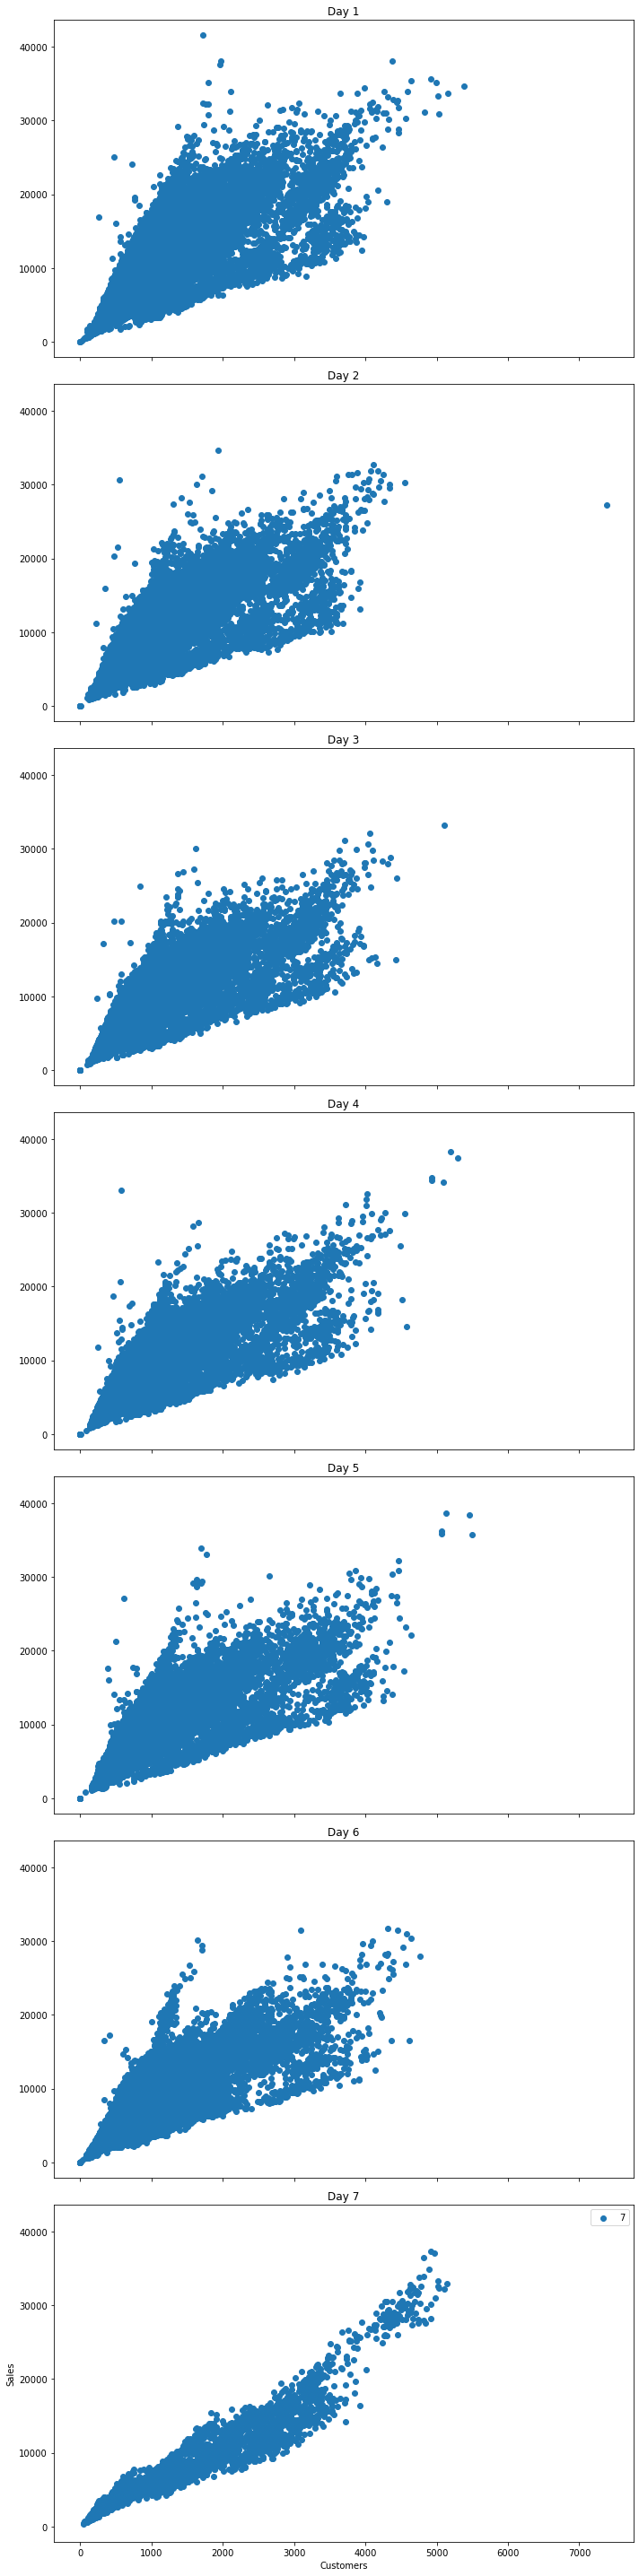

In [32]:
plt.rcParams['figure.figsize'] = (10.0, 40.0)

f, ax = plt.subplots (7, sharex=True, sharey=True)
for i in range(1, 8) :
    data = train[train[ 'DayOfWeek'] == i]
    ax[i - 1].set_title("Day {0}".format(i))
    ax[i - 1].scatter(data[ 'Customers'], data['Sales'], label=i)
    
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

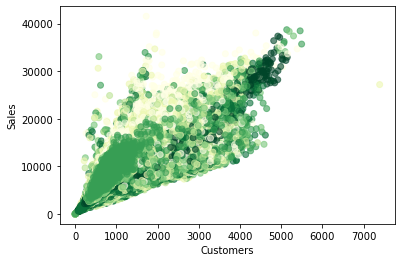

In [12]:
#Plotting "Customer Vs Sales" for each day of week

plt.scatter(train['Customers'], train['Sales'], c=train['DayOfWeek'], alpha=0.6, cmap =plt.cm.get_cmap('YlGn'))
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

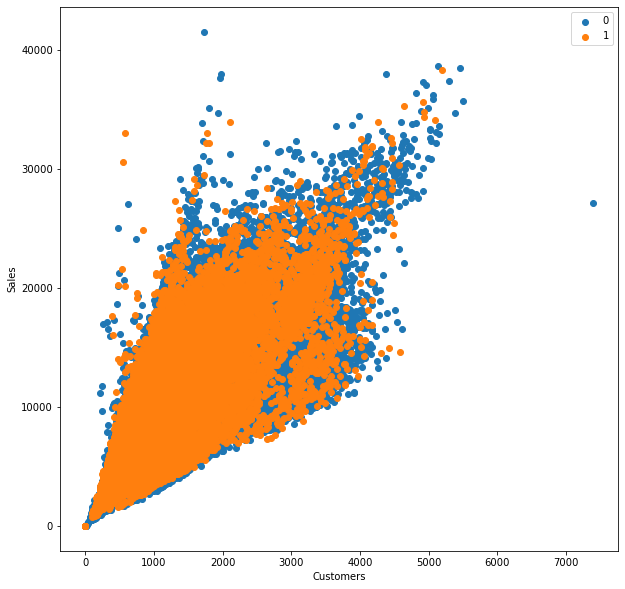

In [38]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
for i in (0,1):
    data = train[train['SchoolHoliday']==i]
    if (len(data)==0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)
    
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

School Holidays are represented by Orange and Sales representated by Blue.

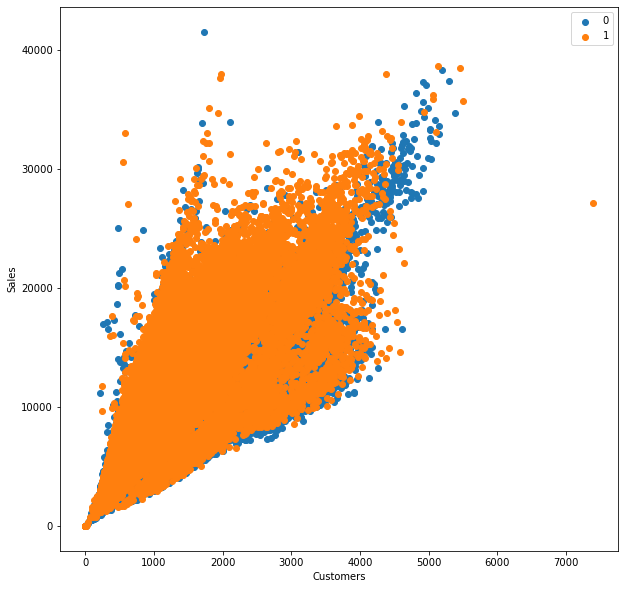

In [41]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
for i in (0,1):
    data = train[train['Promo']==i]
    if (len(data)==0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)
    
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [44]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1
1016179,85,2,2013-01-01,4220,619,1,0,a,1
1016353,259,2,2013-01-01,6851,1444,1,0,a,1
1016356,262,2,2013-01-01,17267,2875,1,0,a,1
1016368,274,2,2013-01-01,3102,729,1,0,a,1


In [49]:
train['SalePerCustomer'] = train['Sales'] / train['Customers']
train['SalePerCustomer'].sample(10)

164029     7.622344
693154     6.875380
462989    13.012531
939353    10.889744
348284     3.414742
744800    10.221239
453379     9.594458
63454     13.596821
4988      12.227820
718016     9.298637
Name: SalePerCustomer, dtype: float64

In [51]:
avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalePerCustomer']].mean()
avg_store.rename(columns=lambda x:'Avg'+x, inplace=True)
store = pd.merge(avg_store.reset_index(), store, on='Store')
store.head()

,Store,AvgSales,AvgCustomers,AvgSalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [53]:
avg_store.sample(10)

,AvgSales,AvgCustomers,AvgSalePerCustomer
Store,,,
1013,3993.560976,443.141207,8.890048
108,11035.360129,848.781350,12.921910
879,3762.983923,347.326367,10.705930
50,4256.070603,358.799743,11.722755
697,10656.173299,1004.641849,10.496306
131,5275.404365,558.897304,9.358994
16,7680.683398,852.477477,8.979154
61,4722.005148,571.738739,8.188622
511,5662.320153,810.598214,6.965514


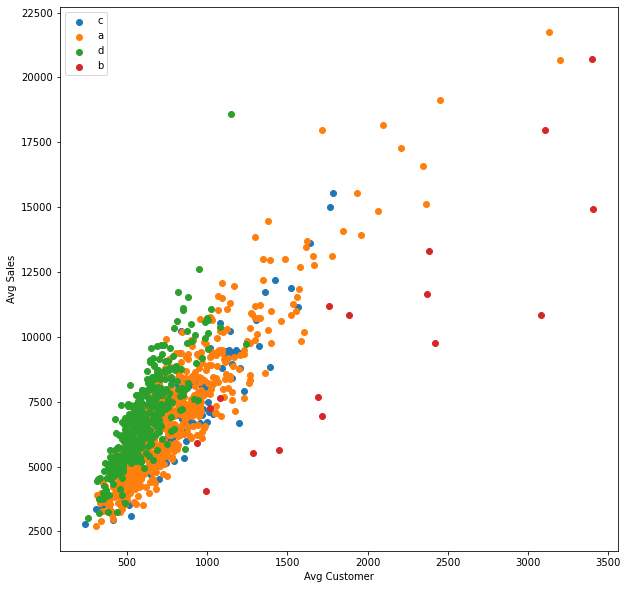

In [54]:
for i in store.StoreType.unique():
    data = store[store['StoreType'] == i]
    if (len(data)==0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)
    
plt.legend()
plt.xlabel("Avg Customer")
plt.ylabel("Avg Sales")
plt.show()

In [55]:
store.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

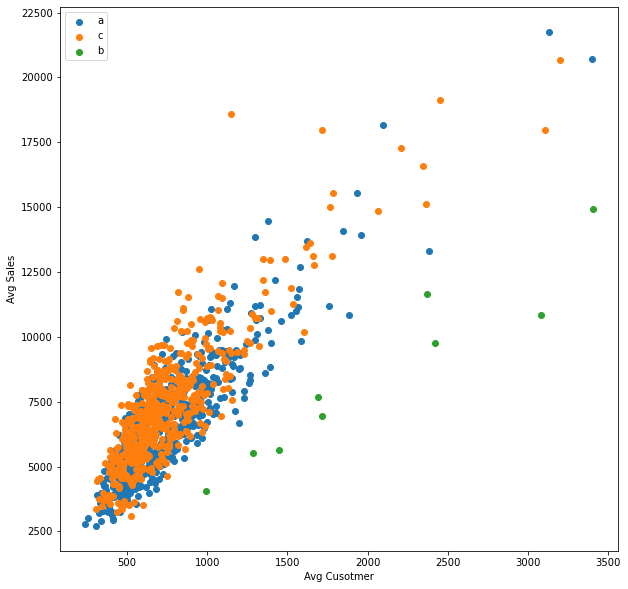

In [56]:
for i in store.Assortment.unique():
    data =store[store['Assortment'] == i]
    if (len(data)==0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)
    
plt.legend()
plt.xlabel('Avg Cusotmer')
plt.ylabel('Avg Sales')
plt.show()

In [57]:
store.Promo2.unique()

array([0, 1])

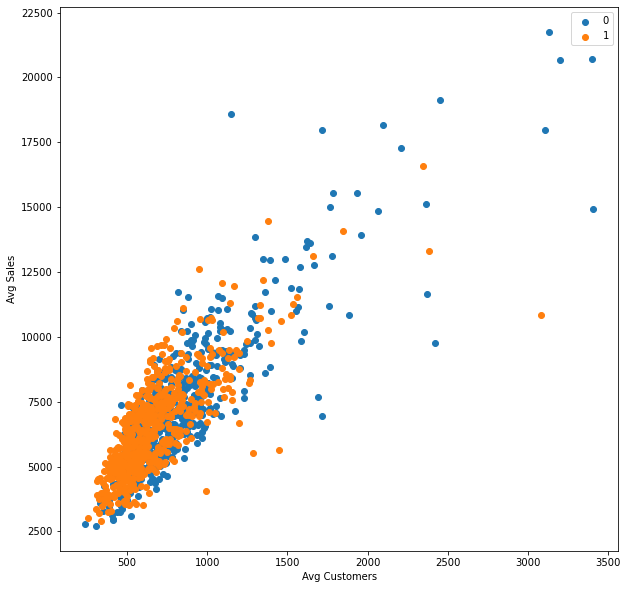

In [58]:
for i in store.Promo2.unique():
    data = store[store['Promo2'] == i]
    if (len(data)==0):
        continue
        
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)
    
plt.legend()
plt.xlabel('Avg Customers')
plt.ylabel('Avg Sales')
plt.show()

### Feature Engineering:

In [59]:
store.isnull().sum()

Store                          0
AvgSales                       0
AvgCustomers                   0
AvgSalePerCustomer             0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

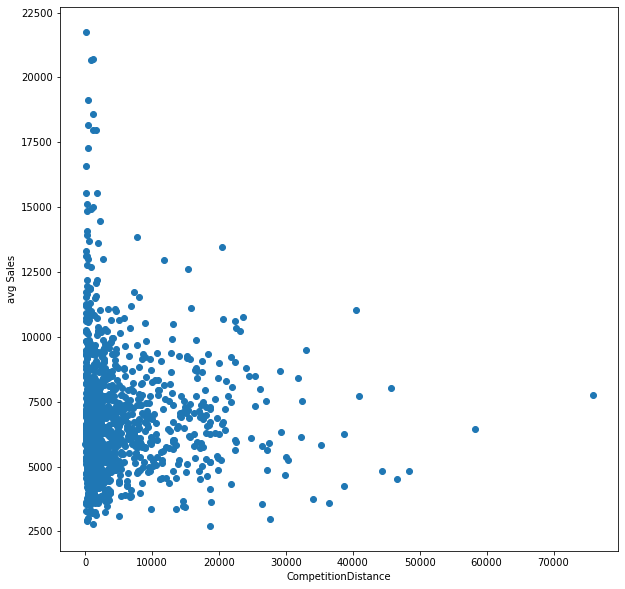

In [61]:
#Fill NA values:
store['CompetitionDistance'].fillna(-1)

plt.scatter(store['CompetitionDistance'], store['AvgSales'])

plt.xlabel('CompetitionDistance')
plt.ylabel('avg Sales')
plt.show()

In [62]:
store.head()

,Store,AvgSales,AvgCustomers,AvgSalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [64]:
store['StoreType'] = store['StoreType'].astype('category').cat.codes
store['Assortment']= store['Assortment'].astype('category').cat.codes
train['StateHoliday'] = train['StateHoliday'].astype('category').cat.codes
store.head()

,Store,AvgSales,AvgCustomers,AvgSalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [65]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer
1017190,1097,2,2013-01-01,5961,1405,1,0,2,1,4.242705
1016179,85,2,2013-01-01,4220,619,1,0,2,1,6.817447
1016353,259,2,2013-01-01,6851,1444,1,0,2,1,4.744460
1016356,262,2,2013-01-01,17267,2875,1,0,2,1,6.005913
1016368,274,2,2013-01-01,3102,729,1,0,2,1,4.255144


In [66]:
merged = pd.merge(train, store, on='Store', how='left')
merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,...,AvgSalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1097,2,2013-01-01,5961,1405,1,0,2,1,4.242705,...,4.015247,1,1,720.0,3.0,2002.0,0,NaN,NaN,NaN
1,85,2,2013-01-01,4220,619,1,0,2,1,6.817447,...,7.119747,1,0,1870.0,10.0,2011.0,0,NaN,NaN,NaN
2,259,2,2013-01-01,6851,1444,1,0,2,1,4.744460,...,4.884189,1,1,210.0,NaN,NaN,0,NaN,NaN,NaN
3,262,2,2013-01-01,17267,2875,1,0,2,1,6.005913,...,6.057073,1,0,1180.0,5.0,2013.0,0,NaN,NaN,NaN
4,274,2,2013-01-01,3102,729,1,0,2,1,4.255144,...,4.035350,1,1,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct"


In [68]:
merged.shape


(844392, 22)

In [69]:
merged.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
SalePerCustomer                  52
AvgSales                          0
AvgCustomers                      0
AvgSalePerCustomer                0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
dtype: int64

In [70]:
merged.fillna(0, inplace=True)

In [71]:
#merged['Date'] = pd.to_datetime(merged['Date'])
merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalePerCustomer                     float64
AvgSales                            float64
AvgCustomers                        float64
AvgSalePerCustomer                  float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [73]:
merged.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
SalePerCustomer              0
AvgSales                     0
AvgCustomers                 0
AvgSalePerCustomer           0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [75]:
merged['year'] = merged.Date.dt.year
merged['month'] = merged.Date.dt.month
merged['day'] = merged.Date.dt.day
merged['week'] = merged.Date.dt.week
merged.sample(10)

/var/folders/5s/jcx1bbbj423bxf9z2l296d800000gn/T/ipykernel_3016/1375335309.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged['week'] = merged.Date.dt.week


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,week
224989,219,6,2013-08-31,1748,225,1,0,1,0,7.768889,...,2.0,2013.0,0,0.0,0.0,0,2013,8,31,35
107320,262,5,2013-04-26,23289,3880,1,1,1,0,6.002320,...,5.0,2013.0,0,0.0,0.0,0,2013,4,26,17
112173,1020,4,2013-05-02,12093,1459,1,1,1,0,8.288554,...,8.0,2015.0,0,0.0,0.0,0,2013,5,2,18
406084,137,5,2014-03-14,7390,972,1,0,0,0,7.602881,...,7.0,2015.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,3,14,11
354675,463,1,2014-01-20,9585,1366,1,1,0,0,7.016837,...,0.0,0.0,0,0.0,0.0,0,2014,1,20,4
610846,767,3,2014-11-12,6219,596,1,1,1,0,10.434564,...,0.0,0.0,0,0.0,0.0,0,2014,11,12,46
113610,404,6,2013-05-04,2724,311,1,0,1,0,8.758842,...,0.0,0.0,1,10.0,2013.0,"Mar,Jun,Sept,Dec",2013,5,4,18
390077,755,2,2014-02-25,7470,771,1,0,0,0,9.688716,...,12.0,2003.0,0,0.0,0.0,0,2014,2,25,9
734379,86,4,2015-04-02,7092,834,1,1,1,1,8.503597,...,2.0,2005.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,4,2,14
835650,528,4,2015-07-23,9453,874,1,0,1,1,10.815789,...,0.0,0.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",2015,7,23,30


In [76]:
merged.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
SalePerCustomer              0
AvgSales                     0
AvgCustomers                 0
AvgSalePerCustomer           0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
year                         0
month                        0
day                          0
week                         0
dtype: int64

In [77]:
#Number of months that competetion has existed for:
merged['MonthsCompetitionOpen'] = 12 * merged['year'] - merged['CompetitionOpenSinceYear'] + merged['month'] - merged['CompetitionOpenSinceMonth']
merged.loc[merged['CompetitionOpenSinceYear'] == 0, 'MonthsCompetitionOpen'] =0

In [79]:
##Number of Week that Promotion has existed for:
merged['WeekPromoOpen'] = 12 * (merged['year'] - merged['Promo2SinceYear']) + (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])

                                                                               
merged.loc[merged['Promo2SinceYear'] == 0, 'WeekPromoOpen'] =0

/var/folders/5s/jcx1bbbj423bxf9z2l296d800000gn/T/ipykernel_3016/820952259.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged['WeekPromoOpen'] = 12 * (merged['year'] - merged['Promo2SinceYear']) + (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])


In [81]:
merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalePerCustomer                     float64
AvgSales                            float64
AvgCustomers                        float64
AvgSalePerCustomer                  float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
year                            

In [82]:
toInt = [
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2SinceWeek',
        'Promo2SinceYear',
        'MonthsCompetitionOpen',
        'WeekPromoOpen'
]

merged[toInt] = merged[toInt].astype(int)

In [83]:
merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalePerCustomer                     float64
AvgSales                            float64
AvgCustomers                        float64
AvgSalePerCustomer                  float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
year                            

In [85]:
med_store = train.groupby('Store')[['Sales', 'Customers', 'SalePerCustomer']].median()
med_store.rename(columns = lambda x:'Med'+x, inplace=True)

store = pd.merge(med_store.reset_index(), store, on='Store')

In [86]:
store.head()

,Store,MedSales,MedCustomers,MedSalePerCustomer,AvgSales,AvgCustomers,AvgSalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4783.0,575.5,8.313092,4953.900510,583.998724,8.408443,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6619.0,744.0,9.123440,6942.568678,750.077022,9.117599,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9430.5,1301.5,7.215175,9638.401786,1321.752551,7.249827,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4616.0,564.0,8.584677,4676.274711,537.340180,8.611229,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [87]:
merged = pd.merge(med_store.reset_index(), merged, on='Store')
merged.head()

,Store,MedSales,MedCustomers,MedSalePerCustomer,DayOfWeek,Date,Sales,Customers,Open,Promo,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,week,MonthsCompetitionOpen,WeekPromoOpen
0,1,4647.0,550.0,8.362376,3,2013-01-02,5530,668,1,0,...,0,0,0,0,2013,1,2,1,22140,0
1,1,4647.0,550.0,8.362376,4,2013-01-03,4327,578,1,0,...,0,0,0,0,2013,1,3,1,22140,0
2,1,4647.0,550.0,8.362376,5,2013-01-04,4486,619,1,0,...,0,0,0,0,2013,1,4,1,22140,0
3,1,4647.0,550.0,8.362376,6,2013-01-05,4997,635,1,0,...,0,0,0,0,2013,1,5,1,22140,0
4,1,4647.0,550.0,8.362376,1,2013-01-07,7176,785,1,1,...,0,0,0,0,2013,1,7,2,22140,0


In [90]:
merged.columns

Index(['Store', 'MedSales', 'MedCustomers', 'MedSalePerCustomer', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'SalePerCustomer', 'AvgSales', 'AvgCustomers',
       'AvgSalePerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'year', 'month',
       'day', 'week', 'MonthsCompetitionOpen', 'WeekPromoOpen'],
      dtype='object')

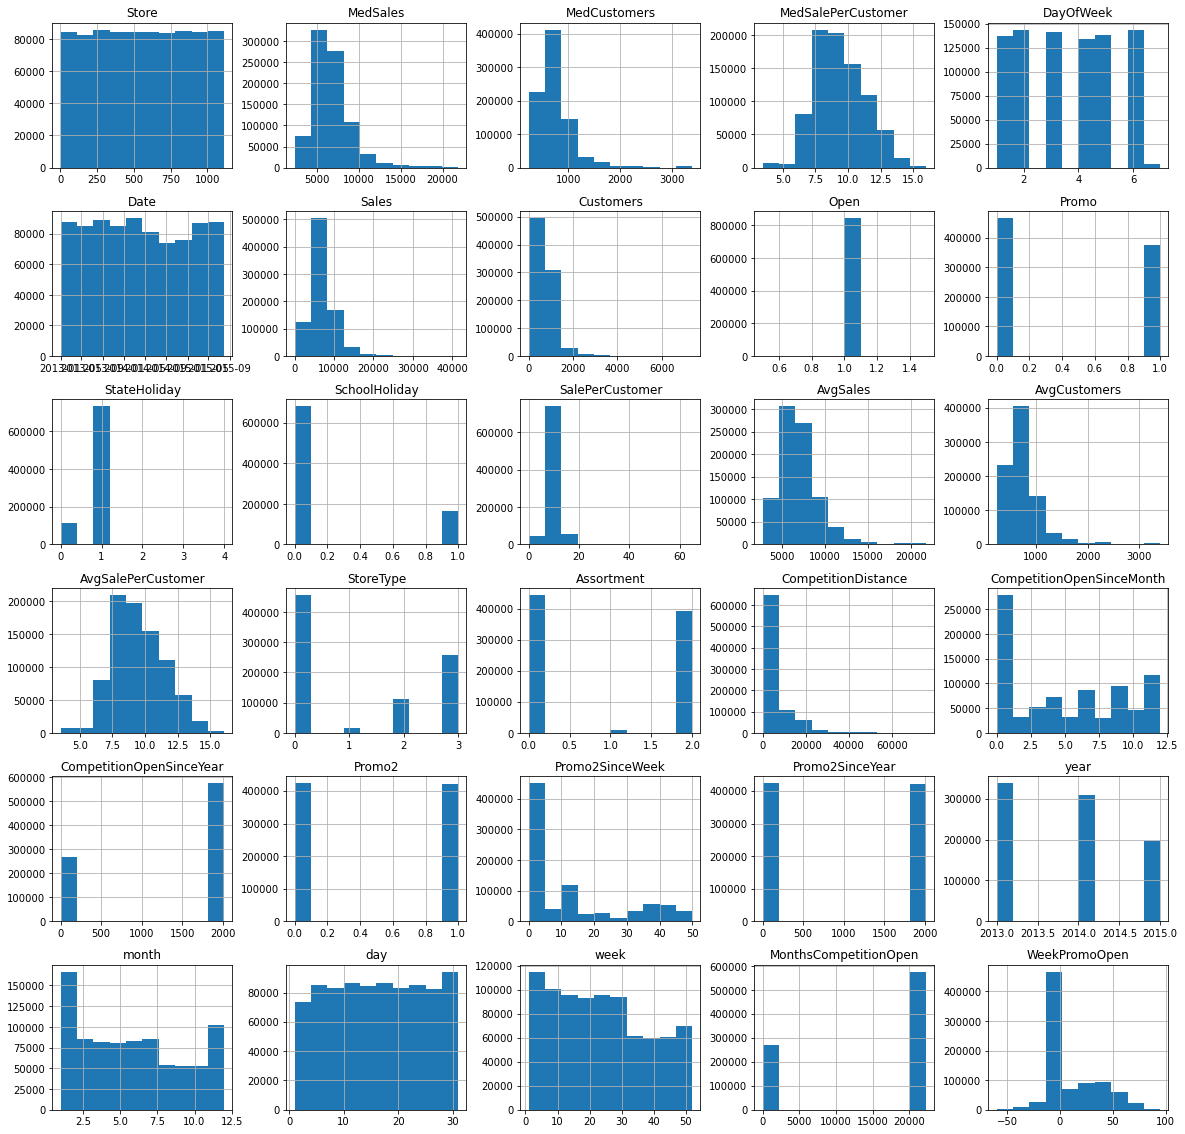

In [91]:
merged.hist(figsize=(20,20))
plt.show()

In [94]:
merged.columns

Index(['Store', 'MedSales', 'MedCustomers', 'MedSalePerCustomer', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'SalePerCustomer', 'AvgSales', 'AvgCustomers',
       'AvgSalePerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'year', 'month',
       'day', 'week', 'MonthsCompetitionOpen', 'WeekPromoOpen'],
      dtype='object')

### Model Building and evolution:

In [95]:
from sklearn.model_selection import train_test_split
X = ['Store', 
     'Customers',
     'CompetitionDistance',
     
     'Promo', 
     'Promo2',
     
     'CompetitionOpenSinceMonth', 
     'CompetitionOpenSinceYear', 
     'Promo2SinceWeek', 
     'Promo2SinceYear', 
     
     'StateHoliday',
     'StoreType', 
     'Assortment', 
     
     'MedSales', 
     'MedCustomers', 
     'MedSalePerCustomer',
       
     
     'DayOfWeek',
     'year', 
     'month',
     'day', 
     'week'
    ]

x_data = merged[X]
y_data = np.log(merged['Sales'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=10)

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error


def plot_importance(model):
    k = list(zip(X, model.feature_importance_))
    k.sort(key=lambda tup: tup[1] )
    
    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)
    
    
    

In [98]:
%%time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param = {'n_estimators':[100, 500, 1000, 1500],
         'max_depth':[2,4,6,8] 
        }

xgboost_tree = xgb.XGBRegressor(
    eta = 0.1, 
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state =1234
)


grid = GridSearchCV(estimator=xgboost_tree, param_grid=param, cv=5, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')

grid_result = grid.fit(x_train, y_train)
best_param = grid_result.best_params_
print('Best Param :', best_param)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/core.py", line 506, in inner_f
    return f(**kwargs)
  File "/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py", line 761, in fit
    train_dmatrix, ev

XGBoostError: [08:18:50] /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/data/data.cc:367: Check failed: valid: Label contains NaN, infinity or a value too large.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000299b48394 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x0000000299b84c90 xgboost::MetaInfo::SetInfo(char const*, void const*, xgboost::DataType, unsigned long) + 312
  [bt] (2) 3   libxgboost.dylib                    0x0000000299b4a340 XGDMatrixSetDenseInfo + 176
  [bt] (3) 4   libffi.8.dylib                      0x00000001036b404c ffi_call_SYSV + 76
  [bt] (4) 5   libffi.8.dylib                      0x00000001036b174c ffi_call_int + 1208
  [bt] (5) 6   _ctypes.cpython-38-darwin.so        0x000000010368c590 _ctypes_callproc + 1200
  [bt] (6) 7   _ctypes.cpython-38-darwin.so        0x00000001036867e4 PyCFuncPtr_call + 1172
  [bt] (7) 8   python3.8                           0x0000000102918f50 _PyObject_MakeTpCall + 640
  [bt] (8) 9   python3.8                           0x0000000102a2e3e0 call_function + 680



/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.